# Import

In [8]:
from pprint import pprint

import colour
import matplotlib.pyplot as plt

## 可視光プロット

c:\Users\ta_yamagishi\venv\py311_color\Lib\site-packages\colour\utilities\verbose.py:265: ColourUsageWarning: The "CIE 2012 2 Degree Standard Observer" has been renamed to "CIE 2015 2 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)  # noqa: B028
c:\Users\ta_yamagishi\venv\py311_color\Lib\site-packages\colour\utilities\verbose.py:265: ColourUsageWarning: The "CIE 2012 10 Degree Standard Observer" has been renamed to "CIE 2015 10 Degree Standard Observer" for consistency with the official CIE name which was adopted in 2015.
  warn(*args, **kwargs)  # noqa: B028


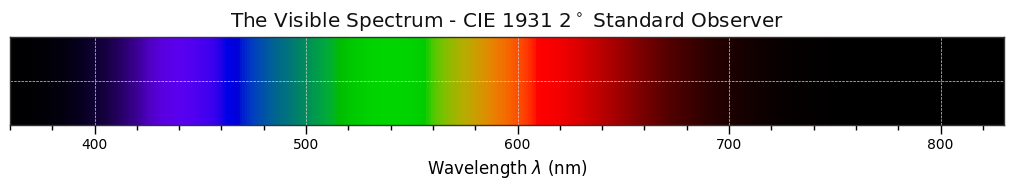

In [3]:
colour.plotting.colour_style()
plt.style.use({'figure.figsize': (10.24, 2.0)})
colour.plotting.plot_visible_spectrum();

## CIE-XYZ 1931 2°視差

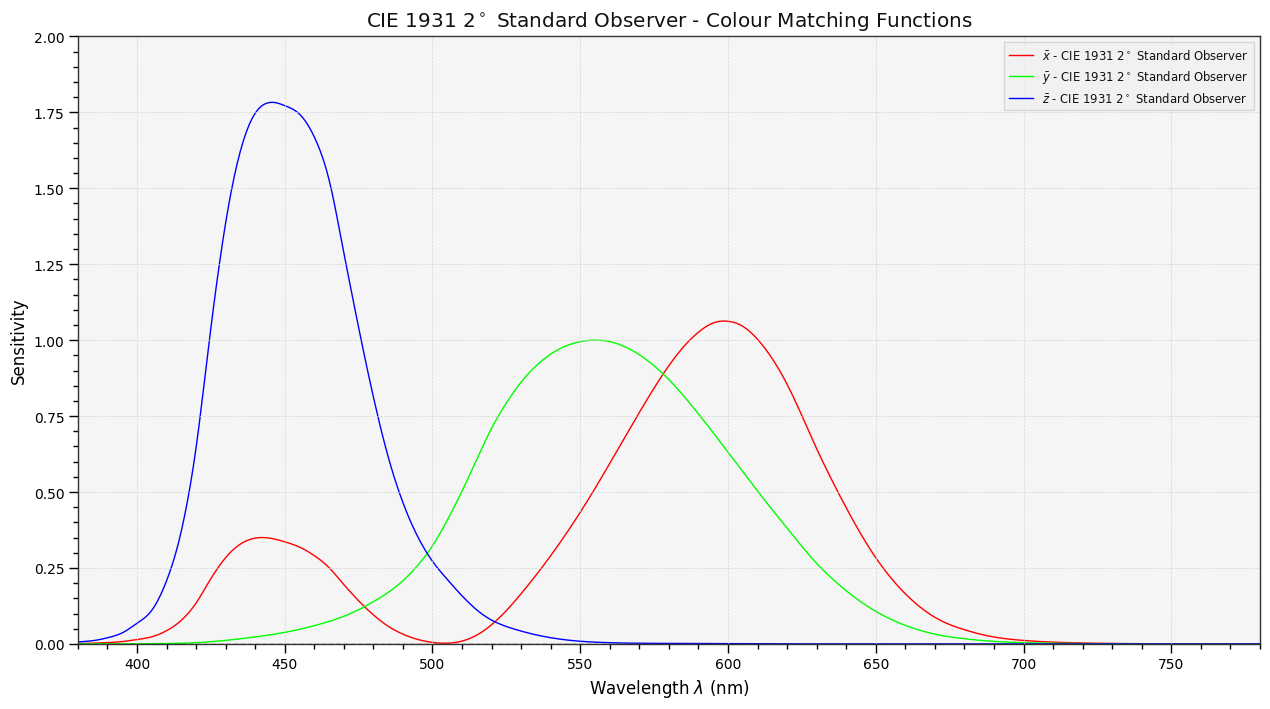

In [4]:
colour.plotting.colour_style()
colour.plotting.plot_single_cmfs(
        'CIE 1931 2 Degree Standard Observer',
        y_label='Sensitivity',
        bounding_box=(380, 780, 0.0, 2.0));

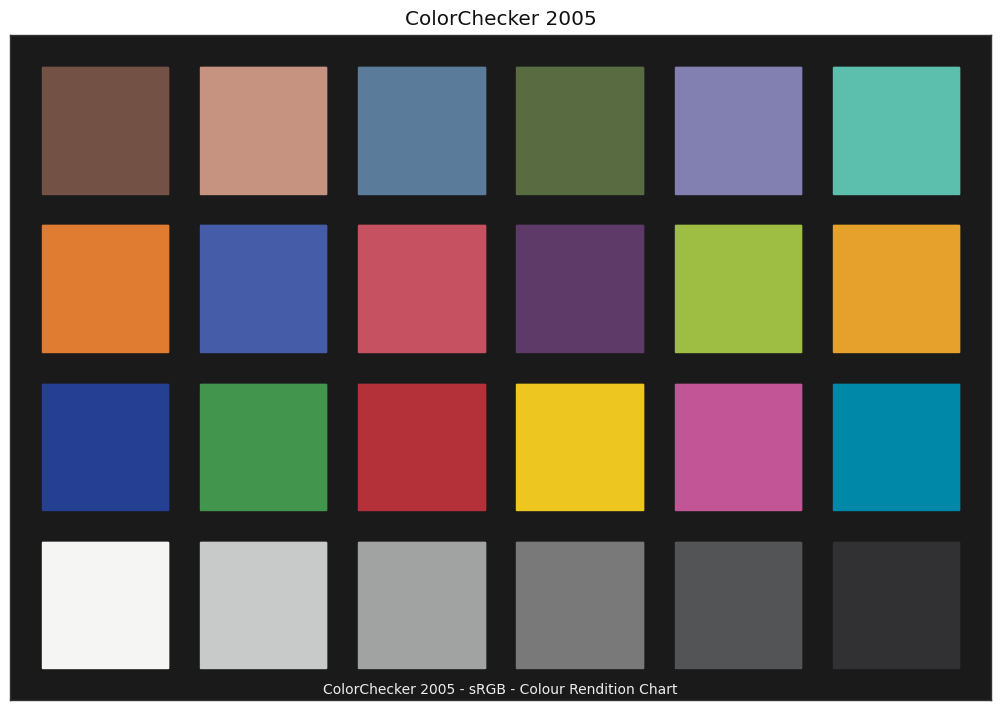

(<Figure size 1280x720 with 1 Axes>,
 <Axes: title={'center': 'ColorChecker 2005'}>)

In [5]:
colour.plotting.plot_single_colour_checker("ColorChecker 2005", text_kwargs={"visible": False})

## チャートのダークスキンを取得

In [ ]:
sd = colour.SDS_COLOURCHECKERS['ColorChecker 2005']['dark skin']
sd

In [ ]:
plot_kwargs = [
    {'use_sd_colours': True},
]
colour.plotting.colour_style()
colour.plotting.plot_multi_sds(
    sd,
    y_tighten=True,
    plot_kwargs=plot_kwargs);

In [ ]:
plot_kwargs = [
    {'use_sd_colours': True},
]
colour.plotting.colour_style()
colour.plotting.plot_single_sd(
    sd,
    y_tighten=True,
    plot_kwargs=plot_kwargs);

In [ ]:
xyz = colour.MSDS_CMFS['CIE 1931 2 Degree Standard Observer']
pprint(xyz)

In [ ]:
data = xyz.to_sds()
x = data[0]

colour.plotting.colour_style()
colour.plotting.plot_multi_sds(
    [x],
    title= 'CIE 1931 XYZ - X',
    plot_kwargs = {
        'use_sd_colours' : True,});

In [ ]:
colour.plotting.colour_style()
colour.plotting.plot_single_sd(
    x, title= 'CIE 1931 XYZ - X', plot_kwargs = {'use_sd_colours' : True,});

In [ ]:
shape = colour.SpectralShape(380, 780, 1)
sd = sd.align(shape)
x = x.align(shape)
spectrum = sd * x
spectrum

In [ ]:
colour.plotting.colour_style()
colour.plotting.plot_single_sd(
    spectrum,
    y_tighten=True,
    bounding_box=(380, 780, 0, 1.1),
    title = 'test' # タイトル変えたい時
);

# スペクトルからXYZを計算
---

### ある色の分光分布を計測
- 計測はとても大変なので、ここではデータからカラーチェッカーの肌色の分光分布を取得し、それをXYZに積分する。

In [9]:
# Colorチェッカーのスペクトルデータを確認
sorted(colour.SDS_COLOURCHECKERS)

['BabelColor Average',
 'ColorChecker N Ohta',
 'ISO 17321-1',
 'babel_average',
 'cc_ohta']

In [10]:
# カラーチェッカーを取得
color_checker = colour.SDS_COLOURCHECKERS.get('ISO 17321-1')

# 取得したデータ確認
print(color_checker)

LazyCanonicalMapping({'dark skin': SpectralDistribution([[  3.80000000e+02,   4.80000000e-02],
                      [  3.85000000e+02,   5.10000000e-02],
                      [  3.90000000e+02,   5.50000000e-02],
                      [  3.95000000e+02,   6.00000000e-02],
                      [  4.00000000e+02,   6.50000000e-02],
                      [  4.05000000e+02,   6.80000000e-02],
                      [  4.10000000e+02,   6.80000000e-02],
                      [  4.15000000e+02,   6.70000000e-02],
                      [  4.20000000e+02,   6.40000000e-02],
                      [  4.25000000e+02,   6.20000000e-02],
                      [  4.30000000e+02,   5.90000000e-02],
                      [  4.35000000e+02,   5.70000000e-02],
                      [  4.40000000e+02,   5.50000000e-02],
                      [  4.45000000e+02,   5.40000000e-02],
                      [  4.50000000e+02,   5.30000000e-02],
                      [  4.55000000e+02,   5.30000000e-02],
     

In [ ]:
# パッチの確認
sorted(color_checker)

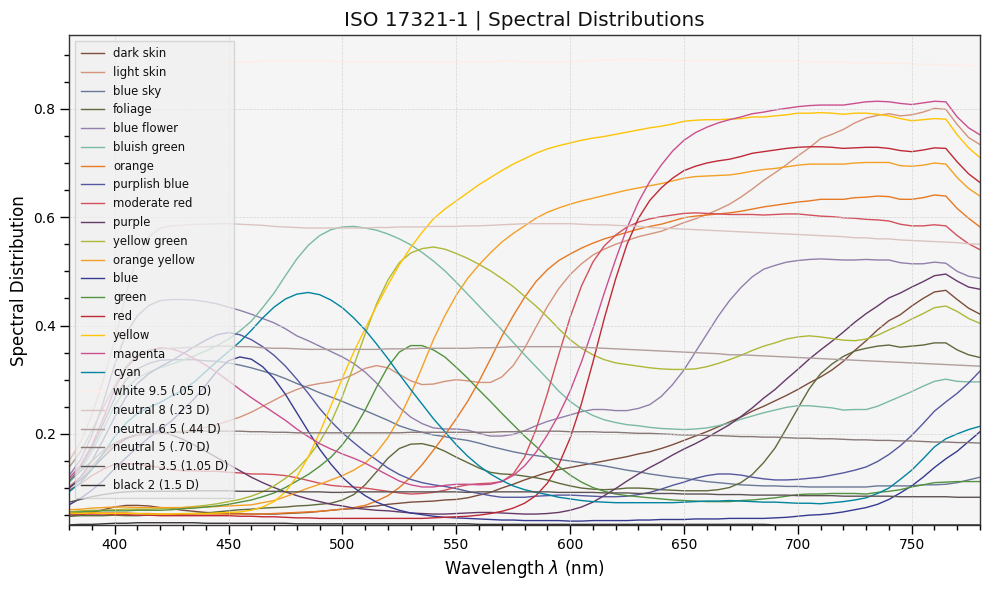

In [14]:
# カラーチェッカーのスペクトルのプロット

sds = [ color_checker.get(key) for key in color_checker]
colour.plotting.colour_style()
plt.style.use({'figure.figsize': (10.0, 6.0)})
colour.plotting.plot_multi_sds(
    sds ,
    plot_kwargs = {'use_sd_colours' : True,},
    title = ('ISO 17321-1 | Spectral Distributions')
);

# 肌色のパッチを取得

In [12]:
# 肌色を取得
patch = color_checker.get('light skin')
print(patch)

[[  3.80000000e+02   1.03000000e-01]
 [  3.85000000e+02   1.20000000e-01]
 [  3.90000000e+02   1.41000000e-01]
 [  3.95000000e+02   1.63000000e-01]
 [  4.00000000e+02   1.82000000e-01]
 [  4.05000000e+02   1.92000000e-01]
 [  4.10000000e+02   1.97000000e-01]
 [  4.15000000e+02   1.99000000e-01]
 [  4.20000000e+02   2.01000000e-01]
 [  4.25000000e+02   2.03000000e-01]
 [  4.30000000e+02   2.05000000e-01]
 [  4.35000000e+02   2.08000000e-01]
 [  4.40000000e+02   2.12000000e-01]
 [  4.45000000e+02   2.17000000e-01]
 [  4.50000000e+02   2.24000000e-01]
 [  4.55000000e+02   2.31000000e-01]
 [  4.60000000e+02   2.40000000e-01]
 [  4.65000000e+02   2.51000000e-01]
 [  4.70000000e+02   2.62000000e-01]
 [  4.75000000e+02   2.73000000e-01]
 [  4.80000000e+02   2.82000000e-01]
 [  4.85000000e+02   2.89000000e-01]
 [  4.90000000e+02   2.93000000e-01]
 [  4.95000000e+02   2.96000000e-01]
 [  5.00000000e+02   3.01000000e-01]
 [  5.05000000e+02   3.10000000e-01]
 [  5.10000000e+02   3.21000000e-01]
 

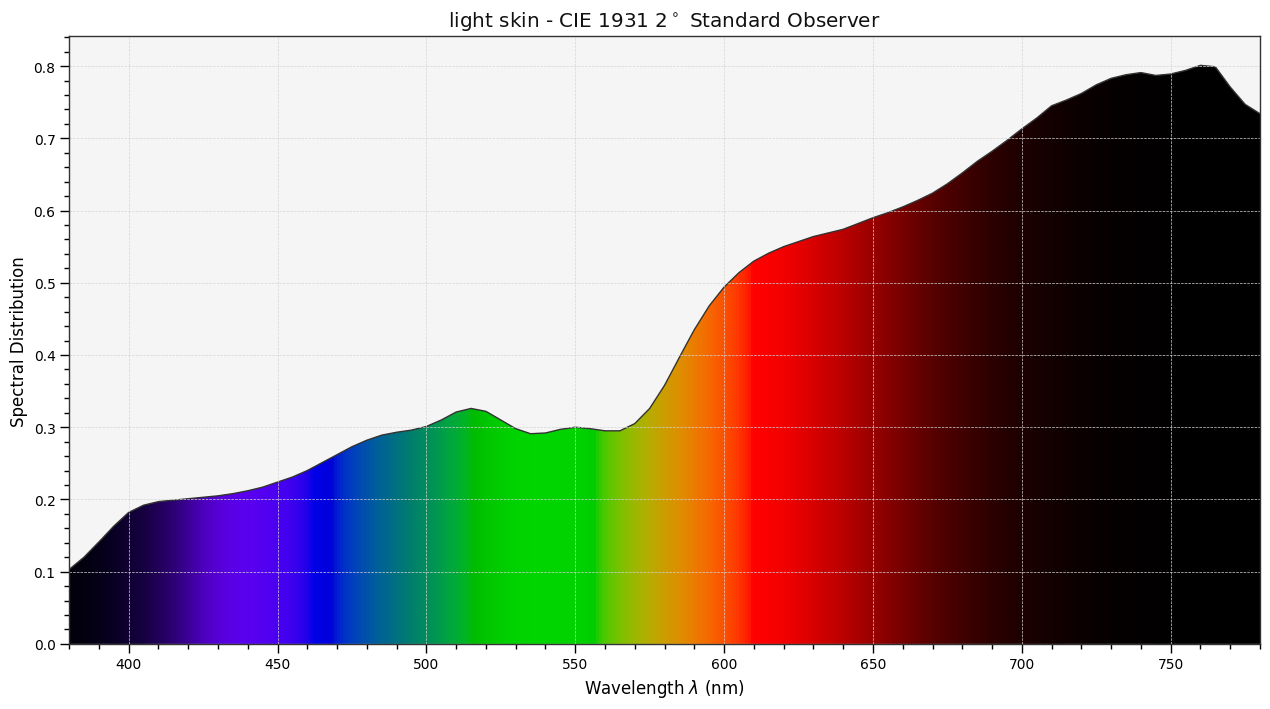

In [13]:
# プロット
colour.plotting.colour_style()
colour.plotting.plot_single_sd(
    patch, y_tighten=True, plot_kwargs=[{'use_sd_colours': True},]);

### D65 光源の取得

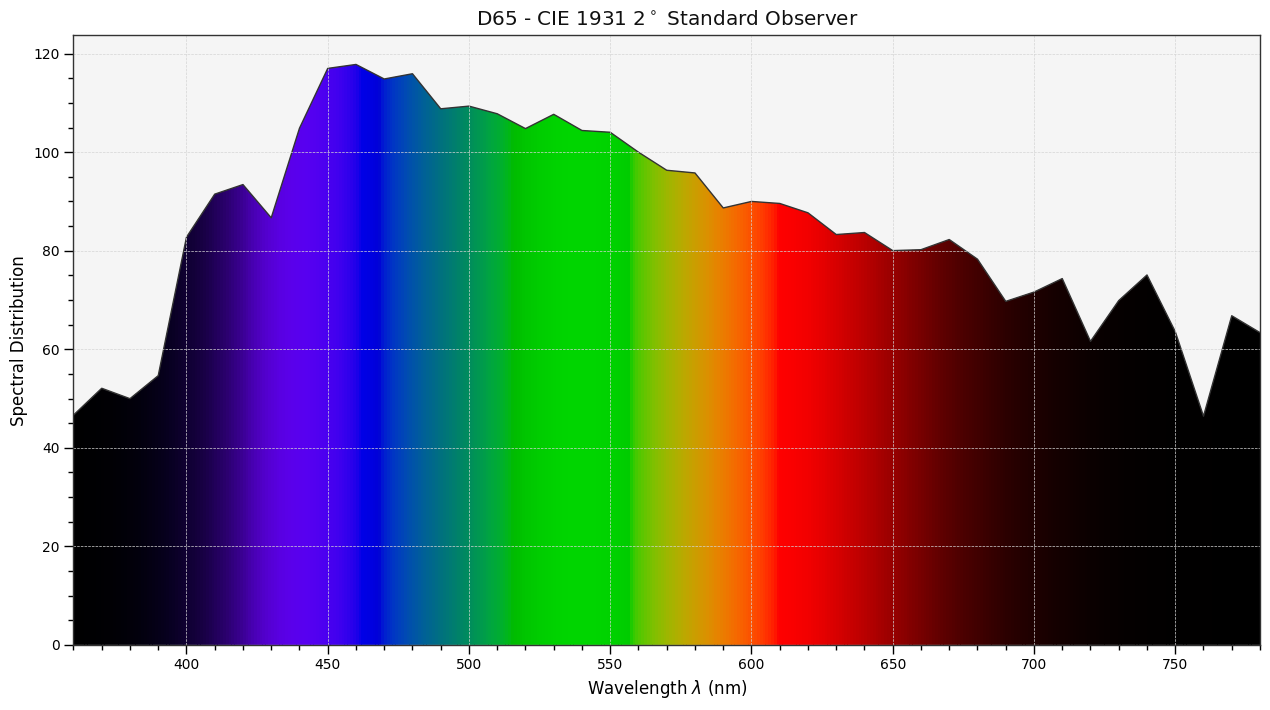

In [15]:
d65 = colour.SDS_ILLUMINANTS.get('D65')
colour.plotting.colour_style()
colour.plotting.plot_single_sd(d65, y_tighten=True,);

### CIE-XYZ 1931 の取得

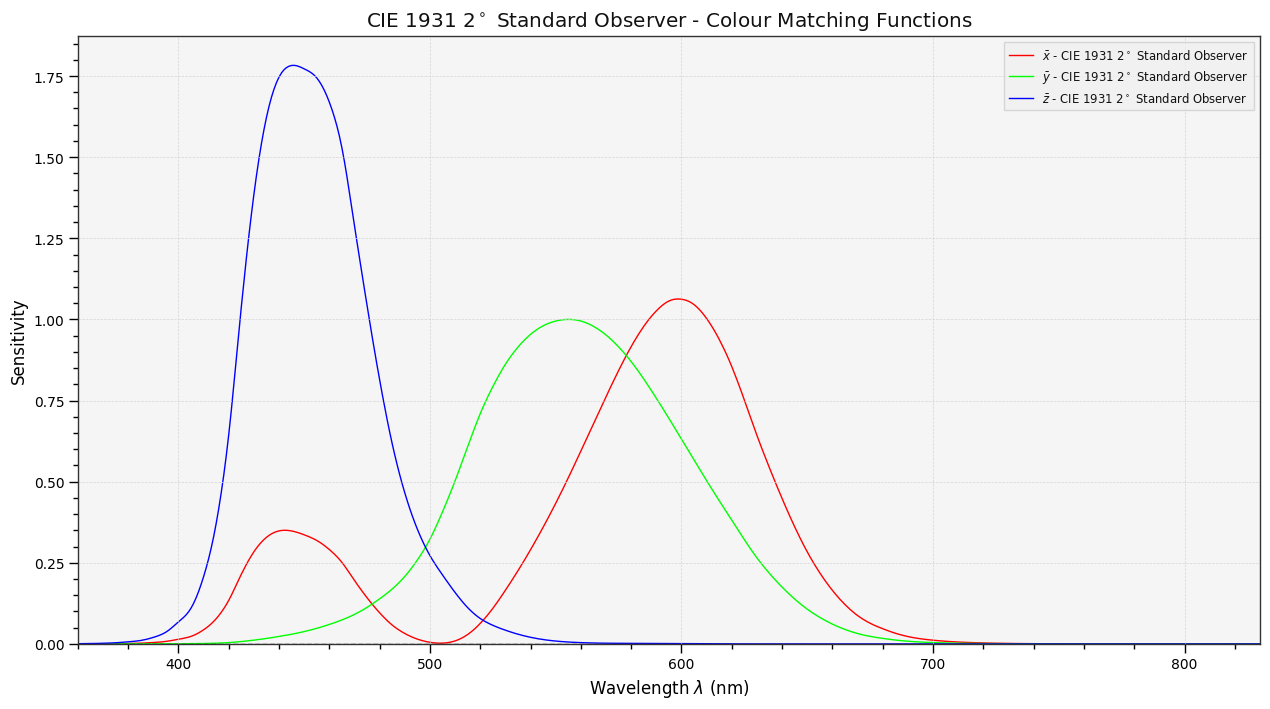

In [18]:
# CIE-XYZ 等色関数 1931 の取得
cmfs = colour.MSDS_CMFS['CIE 1931 2 Degree Standard Observer']

# プロット
colour.plotting.colour_style()
colour.plotting.plot_single_cmfs(cmfs, y_label='Sensitivity',);

In [19]:
# 計算するスペクトルの分割数を設定
TARGET_SHAPE = colour.SpectralShape(380, 780, 5)
cmfs = cmfs.align(TARGET_SHAPE)
patch = patch.align(TARGET_SHAPE)
d65 = d65.align(TARGET_SHAPE)

### 目に入ってくる入射光の計算

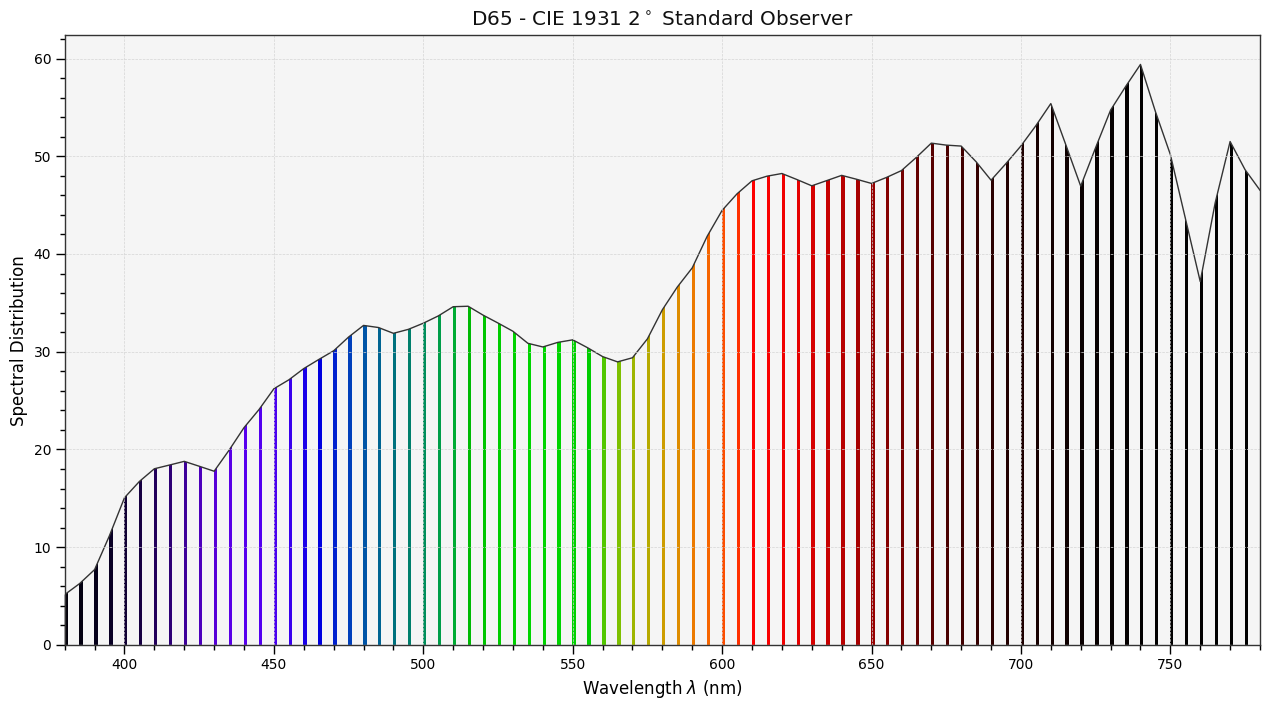

In [20]:
color_sd = d65 * patch

# プロット
colour.plotting.plot_single_sd(
    color_sd,
    y_tighten=True,);

### XYZに積分

In [26]:
XYZ = colour.sd_to_XYZ(color_sd, cmfs)/102.02
XYZ /= 100
xyY = colour.XYZ_to_xyY(XYZ)

In [22]:
print(XYZ)

[ 0.3696419   0.34492182  0.25144309]


In [23]:
print(xyY)

[ 0.38264937  0.35705941  0.34492182]


# 色度図のプロット

In [24]:
pprint(sorted(colour.RGB_COLOURSPACES.keys()))

['ACES2065-1',
 'ACEScc',
 'ACEScct',
 'ACEScg',
 'ACESproxy',
 'ALEXA Wide Gamut',
 'ARRI Wide Gamut 3',
 'ARRI Wide Gamut 4',
 'Adobe RGB (1998)',
 'Adobe Wide Gamut RGB',
 'Apple RGB',
 'Best RGB',
 'Beta RGB',
 'Blackmagic Wide Gamut',
 'CIE RGB',
 'Cinema Gamut',
 'ColorMatch RGB',
 'DCDM XYZ',
 'DCI-P3',
 'DCI-P3-P',
 'DJI D-Gamut',
 'DRAGONcolor',
 'DRAGONcolor2',
 'DaVinci Wide Gamut',
 'Display P3',
 'Don RGB 4',
 'EBU Tech. 3213-E',
 'ECI RGB v2',
 'ERIMM RGB',
 'Ekta Space PS 5',
 'F-Gamut',
 'FilmLight E-Gamut',
 'ITU-R BT.2020',
 'ITU-R BT.470 - 525',
 'ITU-R BT.470 - 625',
 'ITU-R BT.709',
 'ITU-T H.273 - 22 Unspecified',
 'ITU-T H.273 - Generic Film',
 'Max RGB',
 'N-Gamut',
 'NTSC (1953)',
 'NTSC (1987)',
 'P3-D65',
 'PLASA ANSI E1.54',
 'Pal/Secam',
 'ProPhoto RGB',
 'Protune Native',
 'REDWideGamutRGB',
 'REDcolor',
 'REDcolor2',
 'REDcolor3',
 'REDcolor4',
 'RIMM RGB',
 'ROMM RGB',
 'Russell RGB',
 'S-Gamut',
 'S-Gamut3',
 'S-Gamut3.Cine',
 'SMPTE 240M',
 'SMPTE C',


c:\Users\ta_yamagishi\venv\py311_color\Lib\site-packages\colour\utilities\verbose.py:265: ColourUsageWarning: The "ALEXA Wide Gamut" RGB colourspace has been renamed to "ARRI Wide Gamut 3" for consistency with ARRI's new naming convention.
  warn(*args, **kwargs)  # noqa: B028


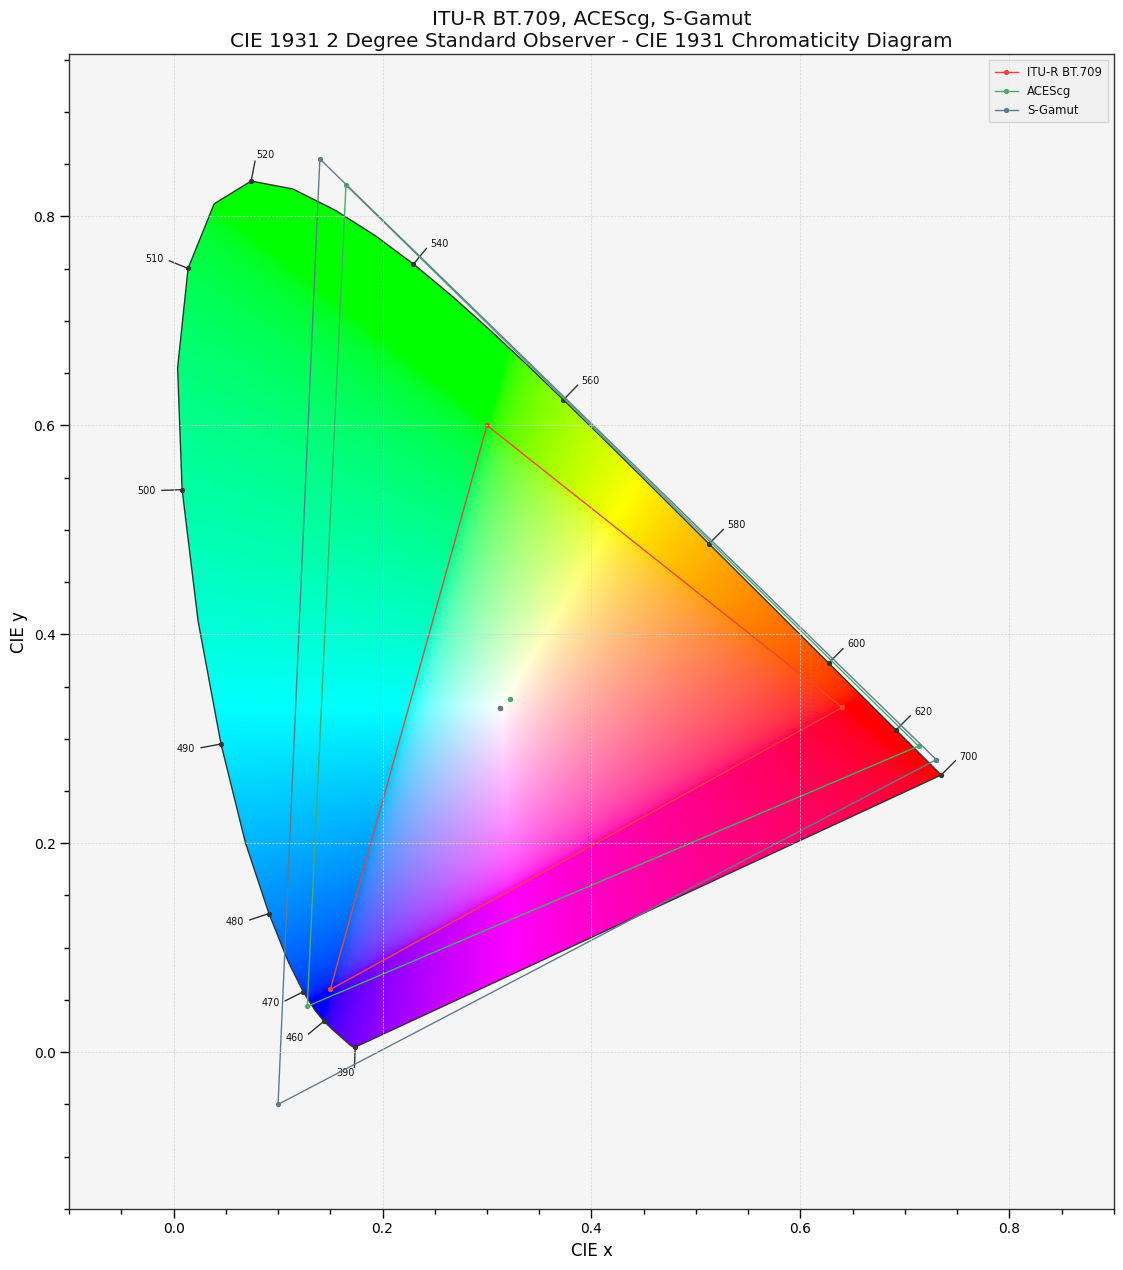

In [25]:
colour.plotting.colour_style()
colour.plotting.plot_RGB_colourspaces_in_chromaticity_diagram_CIE1931(
    ['ITU-R BT.709', 'ACEScg', 'S-Gamut']);